<a href="https://colab.research.google.com/github/duartejr/bootcamp_blue/blob/Gustavo/notebooks/eda_cluster_2_analise_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando os produtos mais caros

Neste notebook, será feito a análise do produtos pertencentes a faixa de preço acima de 484 dólares, ou seja , pertecentes ao cluster 2 feita anteriormente

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [25]:
mercari = pd.read_csv('/content/drive/MyDrive/Datasets/mercari_com_cluster_texto.csv')
mercari.drop('Unnamed: 0',axis=1,inplace=True)
mercari.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,date,stock,cluster,cluster_texto
0,iphone 6s plus defender case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,10.0,1,protective case for the big iphones 6plus or 6...,15-6-2018,2,0,3
1,beautiful rainbow eye iphone plus case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,7.0,1,this soft case is brand new and features a bea...,12-12-2018,1,0,3
2,hold under armour women s t shirt bundle,Women,Athletic Apparel,Shirts & Tops,2,Under Armour,20.0,1,women s under armour t shirts with freedom log...,13-5-2018,11,0,1
3,nike shorts bundle,Women,Athletic Apparel,Shorts,3,Nike,18.0,1,no description yet,24-2-2018,4,0,0
4,bare mineral eye shadow lot,Beauty,Makeup,Eyes,3,No Brand,14.0,0,bare mineral eye shadow verity of colors bare ...,29-10-2018,11,0,3


Agora será filtado apenas aos que pertencem ao cluster 2 do atributo cluster.

In [26]:
mercari_2 = mercari[mercari['cluster']==2]
mercari_2.drop(['date','stock','cluster_texto'],
               axis=1,inplace=True)
mercari_2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,cluster
107,authentic neverfull damier mm,Women,Women's Handbags,Totes & Shoppers,3,Louis Vuitton,806.0,0,this is guarantee authentic pre owned neverful...,2
1048,macbook pro retina like new,Electronics,Computers & Tablets,Laptops & Netbooks,2,Apple,649.0,1,apple inch macbook pro with retina late model ...,2
1820,chanel card holder,Women,Women's Accessories,Wallets,1,Chanel,520.0,1,never used price firm just asking for the pric...,2
3503,lv neverfull reserve,Women,Women's Handbags,Shoulder Bag,3,Louis Vuitton,679.0,0,date code sd3126 interior and exterior is grea...,2
4925,louis vuitton neverfull gm monogram,Women,Women's Handbags,Shoulder Bag,3,Louis Vuitton,1009.0,0,comes with dust bag and receipt does not inclu...,2


In [27]:
mercari_2.shape

(868, 10)

In [28]:
mercari_2['category_1'].value_counts()

Women                     397
Electronics               281
Vintage & Collectibles     91
Men                        40
Beauty                     18
Other                      17
Handmade                    7
Kids                        7
Home                        4
Sports & Outdoors           3
No category                 3
Name: category_1, dtype: int64

In [65]:
mercari_2['brand_name'].value_counts()[0:20]

Louis Vuitton          239
Apple                  198
No Brand               136
Chanel                  37
Adidas                  18
David Yurman            14
Gucci                   13
Canon                   13
Saint Laurent            9
Christian Louboutin      9
Microsoft                8
MCM Worldwide            8
Burberry                 8
Valentino                7
MICHELE                  7
Samsung                  7
Kendra Scott             6
Victoria's Secret        6
Prada                    6
Celine                   5
Name: brand_name, dtype: int64

In [61]:
px.histogram(mercari[mercari['cluster']==2],x='price',marginal="box",
             title='Distribuição de Preço dos Produtos do Cluster 2',
             labels={'price':'Preço (em dolar)','count':'Quantidade'})

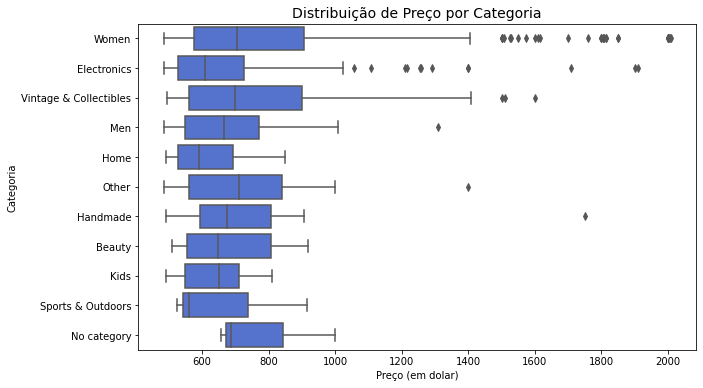

In [62]:
plt.figure(figsize=(10,6))
plt.title('Distribuição de Preço por Categoria',fontsize=14)
sns.boxplot(y='category_1',x='price',data=mercari_2,color='royalblue')
plt.xlabel('Preço (em dolar)')
plt.ylabel('Categoria');

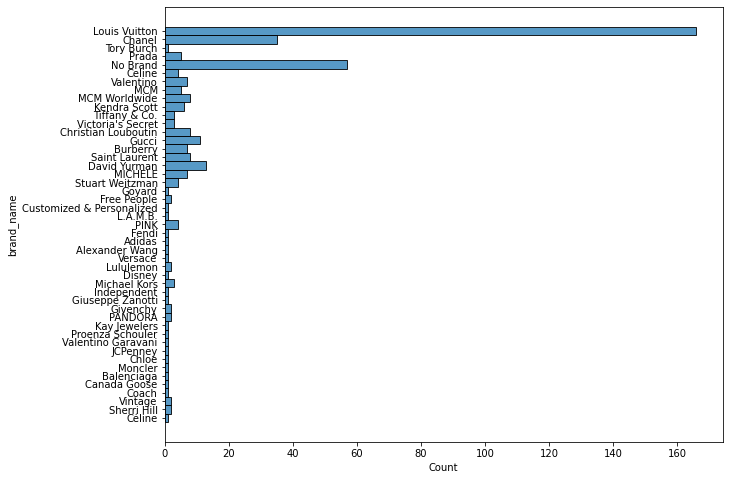

In [32]:
plt.figure(figsize=(10,8))
sns.histplot(y='brand_name',data=mercari_2[mercari_2['category_1']=='Women'])

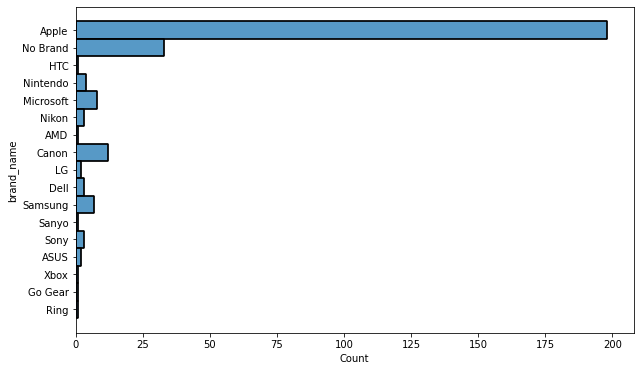

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(y='brand_name',data=mercari_2[mercari_2['category_1']=='Electronics'])

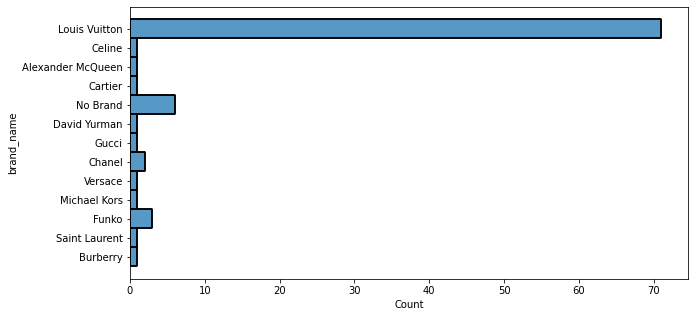

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(y='brand_name',
             data=mercari_2[mercari_2['category_1']=='Vintage & Collectibles'])

Olhando sobre a marca apple no cluster 2

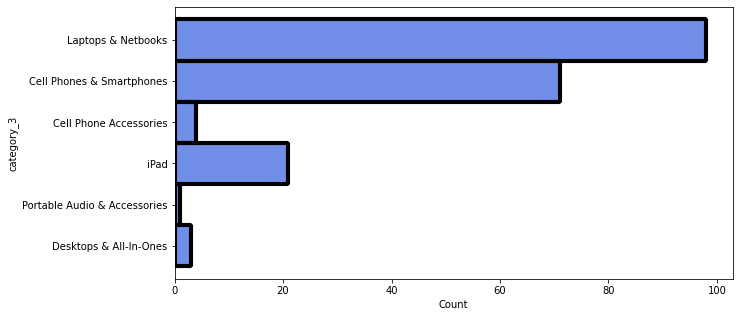

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(y='category_3',data=mercari_2[mercari_2['brand_name']=='Apple'],
             color='royalblue')

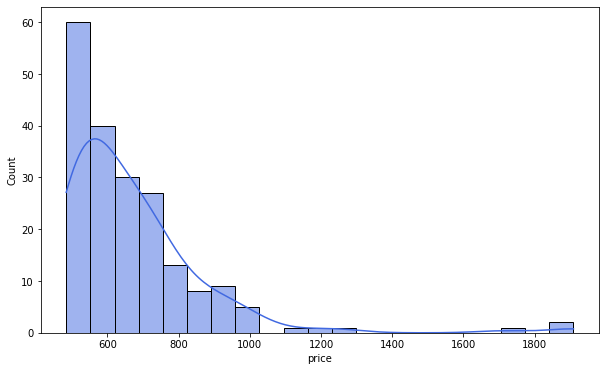

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(x='price',data=mercari_2[mercari_2['brand_name']=='Apple'],
             kde=True,color='royalblue')

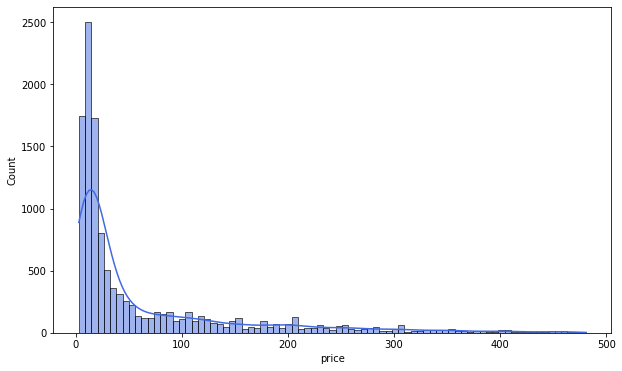

In [66]:
plt.figure(figsize=(10,6))
sns.histplot(x='price',data=mercari[(mercari['brand_name']=='Apple')&(mercari['cluster']!=2)],
             kde=True,color='royalblue')

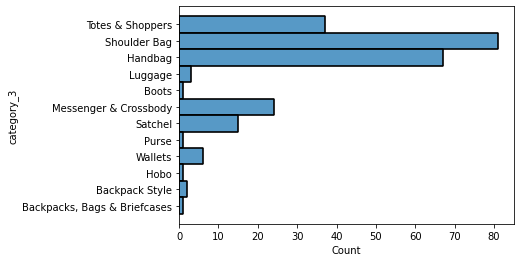

In [37]:
sns.histplot(y='category_3',data=mercari_2[mercari_2['brand_name']=='Louis Vuitton'])

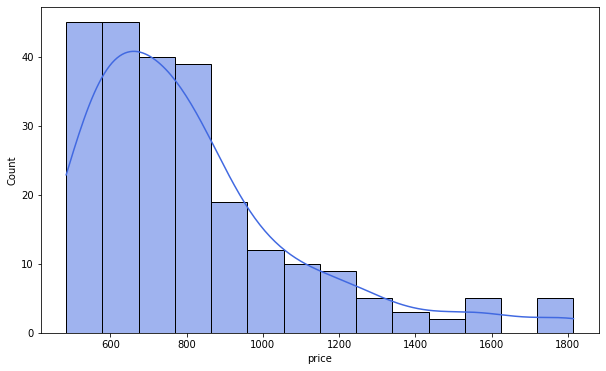

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(x='price',data=mercari_2[mercari_2['brand_name']=='Louis Vuitton'],
             kde=True,color='royalblue')

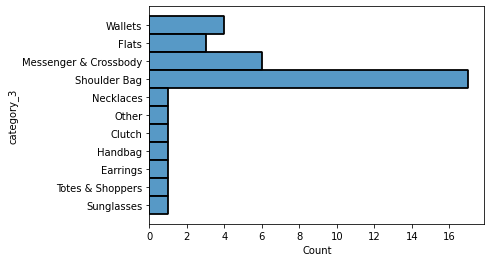

In [64]:
sns.histplot(y='category_3',data=mercari_2[mercari_2['brand_name']=='Chanel'])

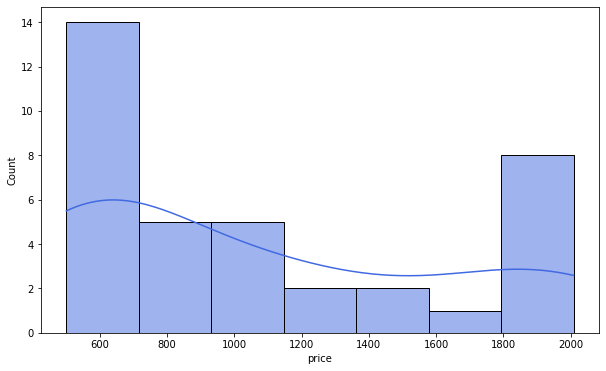

In [63]:
plt.figure(figsize=(10,6))
sns.histplot(x='price',data=mercari_2[mercari_2['brand_name']=='Chanel'],
             kde=True,color='royalblue')